# E- Clustering

## Daten einlesen & Preprocessing

In [136]:
from repml.datasets.trees_fra import read_trees_fra

data = read_trees_fra()

In [137]:
X = data[["baumhoehe", "st_durchm"]].to_numpy()

In [138]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

## K-Means Clustering

In [139]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_3.fit(X)
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_5.fit(X)
kmeans_7 = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans_7.fit(X)
kmeans_9 = KMeans(n_clusters=9, random_state=42, n_init=10)
kmeans_9.fit(X)

KMeans(n_clusters=9, n_init=10, random_state=42)

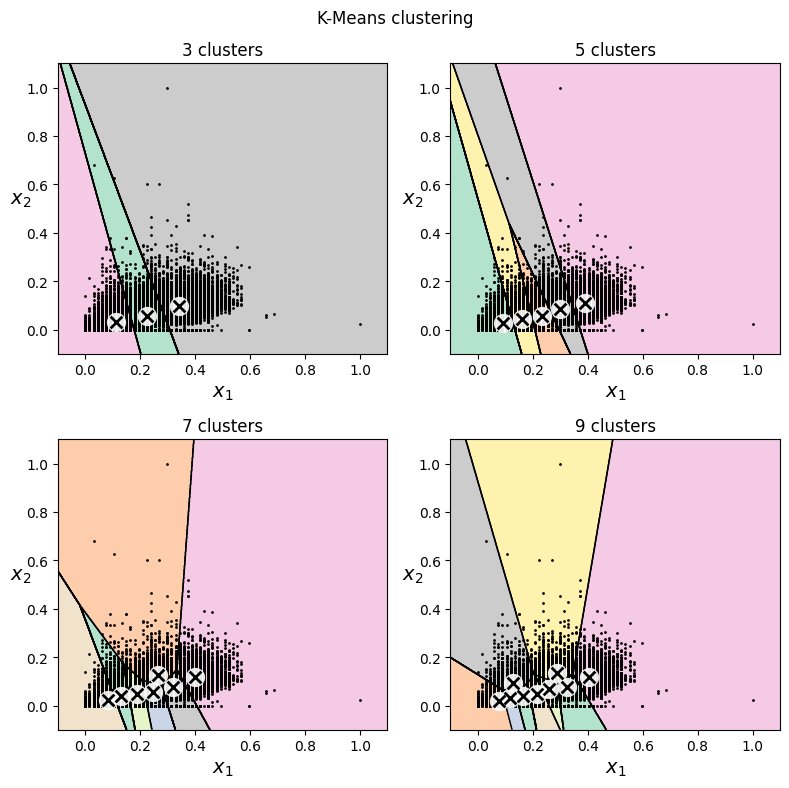

In [140]:
from repml.plotting.cluster_plots import plot_kmeans

plot_kmeans(X, [kmeans_3, kmeans_5, kmeans_7, kmeans_9], figsize=(8, 8))

## BIRCH Clustering

In [141]:
from sklearn.cluster import Birch

birch_2 = Birch(threshold=0.01, n_clusters=2)
birch_2.fit(X)
birch_3 = Birch(threshold=0.01, n_clusters=3)
birch_3.fit(X)
birch_5 = Birch(threshold=0.01, n_clusters=5)
birch_5.fit(X)
birch_7 = Birch(threshold=0.01, n_clusters=7)
birch_7.fit(X)
birch_9 = Birch(threshold=0.01, n_clusters=9)
birch_9.fit(X)
birch_15 = Birch(threshold=0.01, n_clusters=15)
birch_15.fit(X)

Birch(n_clusters=15, threshold=0.01)

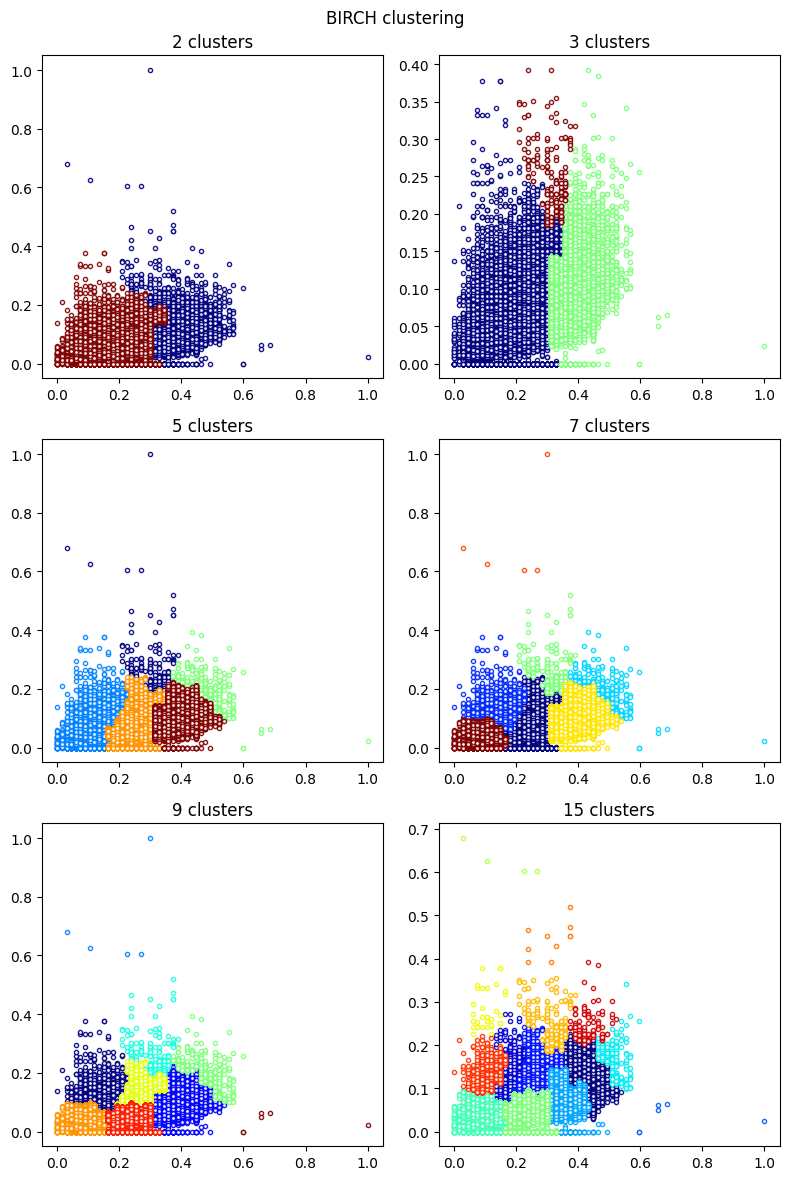

In [142]:
from repml.plotting.cluster_plots import plot_birchs

plot_birchs(X, [birch_2, birch_3, birch_5, birch_7, birch_9, birch_15], figsize=(8, 12))

## Übung
Wie können wir die Information über die Clusterzugehörigkeit in die Preprocessing Pipeline integrieren und damit die Spalten Baumhöhe und Stammdurchmesser ersetzen?

In [143]:
prediction = kmeans_7.predict(X)
prediction

array([0, 0, 0, ..., 5, 0, 4])

In [144]:
data['cluster'] = prediction
data.drop(columns=['baumhoehe', 'st_durchm'], inplace=True)
data

,baumnummer,hochwert,rechtswert,gattungart,gattung,ga_lang,kr_durchm,st_umfang,gebiet,strasse,standort,pflanzjahr,baum_statu,kr_r,cluster
0,1,5549510.90,473366.239,G0444,Platanus,"Platanus acerifolia, Gewöhnliche Platane",8.0,141.0,Straßen,Ackermannstrasse,Alte BNr. 1,1920,NaN,4.0,0
1,2,5549517.24,473363.459,G0444,Platanus,"Platanus acerifolia, Gewöhnliche Platane",8.0,141.0,Straßen,Ackermannstrasse,Alte BNr. 3,1920,NaN,4.0,0
2,3,5549524.39,473360.149,G0444,Platanus,"Platanus acerifolia, Gewöhnliche Platane",8.0,138.0,Straßen,Ackermannstrasse,Alte BNr. 5,1920,NaN,4.0,0
3,5,5549537.75,473354.479,G0444,Platanus,"Platanus acerifolia, Gewöhnliche Platane",8.0,141.0,Straßen,Ackermannstrasse,Alte BNr. 9,1920,NaN,4.0,0
4,6,5549544.09,473351.429,G0444,Platanus,"Platanus acerifolia, Gewöhnliche Platane",8.0,132.0,Straßen,Ackermannstrasse,Alte BNr. 11,1920,NaN,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159182,43/B,5559413.80,478440.300,G0467,Prunus,"Prunus cerasifera -Nigra-, Blut-Pflaume",6.0,79.0,Straßen,Massbornstrasse,NaN,2000,NaN,3.0,0
159183,43/C,5559410.70,478439.100,G0467,Prunus,"Prunus cerasifera -Nigra-, Blut-Pflaume",2.0,31.0,Straßen,Massbornstrasse,NaN,2010,NaN,1.0,5
159184,43/D,5559407.30,478437.300,G0497,Prunus,"Prunus species, Kirsche",4.0,79.0,Straßen,Massbornstrasse,NaN,2000,NaN,2.0,5
159185,42,5555665.90,478257.500,G0625,Styphnolobium,"Styphnolobium japonicum, Schnurbaum",10.0,220.0,Grünanlagen,Karl-Kirchner-Siedlung,NaN,2011,NaN,5.0,0


In [145]:
tree_counts = data["gattung"].value_counts()
rare_trees = tree_counts[tree_counts < 100].index.to_list()

In [146]:
data["gattung"] = data["gattung"].astype("object")
data.loc[data.query(f"gattung == @rare_trees").index, "gattung"] = "rare"
data["gattung"] = data["gattung"].astype("category")

In [147]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(
    data, test_size=0.2, random_state=42, stratify=data["gattung"]
)

In [148]:
#num_features = ["kr_durchm", "baumhoehe", "st_durchm", "pflanzjahr"]
#cat_features = ["gebiet", "baum_statu"]
num_features = ["kr_durchm", "pflanzjahr"]
cat_features = ["gebiet", "cluster", "baum_statu"]

y = ["gattung"]
X = [*num_features, *cat_features]

In [149]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    remainder="drop",
    transformers=[
        ("std_scaler", StandardScaler(), num_features),
        ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_features),
    ],
)

In [150]:
ct_transformed = ct.fit_transform(X=train_data[X])
ct_transformed

array([[-0.5195075 ,  0.21165808,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.71836031, -0.37705167,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.26222819,  0.83961514,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.71836031,  0.01542149,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.5195075 ,  0.91810978,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.27193394,  0.40789466,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [151]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, min_samples_split=20)

In [152]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=clf, X=ct.fit_transform(train_data[X]), y=train_data[y], cv=5)

array([0.36415391, 0.36729486, 0.35798979, 0.35992776, 0.36397189])

In [153]:
clf.fit(X=ct.transform(train_data[X]), y=train_data[y])

DecisionTreeClassifier(min_samples_split=20, random_state=42)

In [154]:
clf.score(X=ct.transform(test_data[X]), y=test_data[y])

0.37123472689009646

In [155]:
from sklearn.metrics import f1_score

y_pred = clf.predict(ct.transform(test_data[X]))
f1_score(y_true=test_data[y], y_pred=y_pred, average="macro")

0.2075429370728911